In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\kilia\Desktop\MA_Master\Vorlesung_S5\DataMining\proj\proj\data_mining\data.csv')
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [2]:
print(df.columns)
print("shape:",df.shape)
#print(df.head())
print(df.isnull().sum())

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')
shape: (251079, 15)
Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [3]:
df = df.drop(columns=['Unnamed: 0'])
print(df.isnull().sum())

brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [4]:
#droppe duplicates row 
print(df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("shape:",df.shape)

6353
shape: (244726, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244726 entries, 0 to 244725
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     244726 non-null  object 
 1   model                     244726 non-null  object 
 2   color                     244642 non-null  object 
 3   registration_date         244722 non-null  object 
 4   year                      244726 non-null  object 
 5   price_in_euro             244726 non-null  object 
 6   power_kw                  244593 non-null  object 
 7   power_ps                  244598 non-null  object 
 8   transmission_type         244726 non-null  object 
 9   fuel_type                 244726 non-null  object 
 10  fuel_consumption_l_100km  218134 non-null  object 
 11  fuel_consumption_g_km     244726 non-null  object 
 12  mileage_in_km             244585 non-null  float64
 13  offer_description         244725 non-null  o

In [6]:
df["fuel_type"].value_counts()

fuel_type
Petrol      139556
Diesel       84865
Hybrid       11752
Electric      5878
LPG           1156
             ...  
14900            1
09/2017          1
06/2017          1
06/2018          1
06/2020          1
Name: count, Length: 136, dtype: int64

In [7]:
df = df[df["fuel_type"].isin(["Petrol", "Diesel"])]
df["fuel_type"].value_counts()

fuel_type
Petrol    139556
Diesel     84865
Name: count, dtype: int64

In [8]:
df.head(5)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [9]:
import numpy as np
def clean_fuel_consumption(value): 
    if pd.isna(value) or 'l/100 km' not in str(value):
        if value != "nan" and not isinstance(value, float):
            print("value:", value)
        return np.nan
    try:
        return float(value.split(' ')[0].replace(',', '.'))
    except:
        return np.nan

In [10]:
df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].apply(clean_fuel_consumption)

value: 3,4 kg/100 km
value: 3,5 kg/100 km
value: 3,5 kg/100 km
value: 7,1 kg/100 km
value: 3,3 kg/100 km
value: 3,6 kg/100 km


In [11]:
for col in ['power_ps', 'power_kw', 'mileage_in_km', 'price_in_euro', 'fuel_consumption_l_100km']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224421 entries, 0 to 244723
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     224421 non-null  object 
 1   model                     224421 non-null  object 
 2   color                     224349 non-null  object 
 3   registration_date         224421 non-null  object 
 4   year                      224421 non-null  object 
 5   price_in_euro             224421 non-null  int64  
 6   power_kw                  224348 non-null  float64
 7   power_ps                  224348 non-null  float64
 8   transmission_type         224421 non-null  object 
 9   fuel_type                 224421 non-null  object 
 10  fuel_consumption_l_100km  205225 non-null  float64
 11  fuel_consumption_g_km     224421 non-null  object 
 12  mileage_in_km             224392 non-null  float64
 13  offer_description         224421 non-null  object

In [12]:
print("shape:",df.shape)
#print(df.head())
print(df.isnull().sum())

shape: (224421, 14)
brand                           0
model                           0
color                          72
registration_date               0
year                            0
price_in_euro                   0
power_kw                       73
power_ps                       73
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    19196
fuel_consumption_g_km           0
mileage_in_km                  29
offer_description               0
dtype: int64


In [13]:
df['transmission_type'].value_counts() #frage ist halt was mit nan machen bzw Unknown? würde droppen aber kp - fragen!

transmission_type
Manual            112562
Automatic         110536
Unknown             1010
Semi-automatic       313
Name: count, dtype: int64

# Brand clean 

In [14]:
print(df["brand"].value_counts() )
df["model"].value_counts()

brand
volkswagen       31804
mercedes-benz    25844
audi             19933
opel             19057
bmw              18634
ford             17258
skoda            12970
seat             10940
renault           7283
hyundai           5713
peugeot           5224
kia               4780
fiat              4061
mini              3966
mazda             3717
porsche           3555
toyota            3516
citroen           3423
volvo             3412
nissan            3194
land-rover        2826
dacia             2623
alfa-romeo        1299
jaguar            1256
smart             1239
jeep              1185
maserati           651
mitsubishi         611
honda              578
ferrari            556
bentley            512
dodge              419
lamborghini        356
ssangyong          328
aston-martin       276
saab               229
daihatsu           203
chevrolet          186
lada               185
cadillac           150
isuzu              130
lancia             103
infiniti           100
daewo

model
Volkswagen Golf    7225
Opel Astra         4110
Opel Corsa         4020
Ford Focus         3736
SEAT Leon          3655
                   ... 
Mazda RX-8            1
Lancia Dedra          1
Lancia ZETA           1
Bentley Turbo R       1
Alfa Romeo 155        1
Name: count, Length: 1221, dtype: int64

In [15]:
import re


def fix_model_brand_conflicts(df):
    '''Diese Funktion überprüft, ob es Zeilen gibt, in denen brand = model ist. In diesen Zeilen haben wir keine Informationen
    über das Model. 
    
    Um die Zeilen aber nicht direkt zu droppen, wird vorher geschaut, ob man über bestimmte Spalten das Model eindeutig zuornden kann.
    Ist eine eindeutige Zuordnung möglich, dann überschreiben wir die ursprüngliche Ausprägung in model. Ist keine Zuordnung möglich, dann wird die Zeile
    gedroppt.
    '''

    def normalize(text):
        if pd.isna(text):
            return ""
        return re.sub(r'[^a-z0-9]', '', text.lower())

    df.loc[:, 'brand_norm'] = df['brand'].apply(normalize)
    df.loc[:, 'model_norm'] = df['model'].apply(normalize)

    mask_same = df['brand_norm'] == df['model_norm']

    problem_rows = df[mask_same].copy()
    clean_rows = df[~mask_same].copy()

    grouped_models = clean_rows \
        .groupby(['brand', 'power_ps', 'fuel_consumption_g_km', 'transmission_type', 'fuel_type'])['model'] \
        .unique().reset_index() 

    grouped_models = grouped_models[grouped_models['model'].apply(len) == 1] # nur kontexte bei denen model unique ist (ein element in der liste)
    grouped_models['model'] = grouped_models['model'].apply(lambda x: x[0]) # nimm nur das erste element aus der liste

    problem_fixed = problem_rows.merge(grouped_models, on=['brand', 'power_ps', 'fuel_consumption_g_km', 'transmission_type', 'fuel_type'],
                                       how='left', suffixes=('', '_fixed'))

    recovered = problem_fixed[problem_fixed['model_fixed'].notna()].copy()
    recovered['model'] = recovered['model_fixed']
    recovered = recovered.drop(columns=['model_fixed'])

    final_df = pd.concat([clean_rows, recovered], ignore_index=True) \
                 .drop(columns=['brand_norm', 'model_norm'])

    return final_df

fix_model_brand_conflicts(df)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148.0,201.0,Manual,Petrol,10.9,260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191.0,260.0,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110.0,150.0,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110.0,150.0,Manual,Petrol,9.5,225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132.0,179.0,Manual,Petrol,7.2,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222927,volkswagen,Volkswagen Polo,red,01/2019,2019,12900,70.0,95.0,Manual,Diesel,4.0,- (g/km),134000.0,"POLO Highline 1,6 l TDI SCR 70 kW (95 PS) 5-Gang"
222928,volkswagen,Volkswagen T6.1 Multivan,silver,06/2021,2021,30980,110.0,150.0,Manual,Diesel,7.4,194 g/km,101000.0,T6__MODEL_OTHER T6.1 Kasten KR 2.0 TDI Navi. AHK.
222929,volkswagen,Volkswagen T7 Multivan,red,04/2022,2022,54990,150.0,204.0,Automatic,Petrol,8.9,202 g/km,21080.0,T7 Life DSG 6Sitzer AHK Navi Media Kame
222930,volkswagen,Volkswagen T7 Multivan,red,01/2023,2023,72990,110.0,150.0,Automatic,Petrol,0.8,42 g/km,9000.0,"Style Motor: 1,4 l eHybrid OPF 110 kW ("


In [16]:
df["brand"].unique()

array(['alfa-romeo', 'aston-martin', 'audi', 'bentley', 'bmw', 'cadillac',
       'chevrolet', 'chrysler', 'citroen', 'dacia', 'daewoo', 'daihatsu',
       'dodge', 'ferrari', 'fiat', 'ford', 'honda', 'hyundai', 'infiniti',
       'isuzu', 'jaguar', 'jeep', 'kia', 'lada', 'lamborghini', 'lancia',
       'land-rover', 'maserati', 'mazda', 'mercedes-benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'proton',
       'renault', 'rover', 'saab', 'seat', 'skoda', 'smart', 'ssangyong',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
# Count the number of unique models
model_count = len(df['model'].unique())
print(f"Number of unique model values: {model_count}")

# Get a count of models per brand
brand_model_counts = df.groupby('brand')['model'].nunique().sort_values(ascending=False)
print("\nTop 10 brands by number of unique models:")
print(brand_model_counts.head(10))

Number of unique model values: 1221

Top 10 brands by number of unique models:
brand
mercedes-benz    271
bmw               92
volkswagen        79
ford              48
audi              44
mini              39
nissan            36
toyota            36
opel              34
citroen           33
Name: model, dtype: int64


In [36]:
# Check for NaN values in model
nan_count = df['model'].isna().sum()

# Check for empty strings
empty_str_count = (df['model'] == '').sum()

# Check for models that are the same as the brand
brand_model_same_count = (df['model_norm'] == df['brand_norm']).sum()

# Check for models that contain the brand name
brand_in_model_count = df.apply(
    lambda row: row['brand_norm'] in row['model_norm'] if isinstance(row['model_norm'], str) else False, 
    axis=1
).sum()

# Print summary
print(f"NaN values in model column: {nan_count}")
print(f"Empty strings in model column: {empty_str_count}")
print(f"Models equal to brand name: {brand_model_same_count}")
print(f"Models containing brand name: {brand_in_model_count}")

# Display sample rows where model equals brand
if brand_model_same_count > 0:
    print("\nSample rows where model equals brand:")
    print(df[df['model_norm'] == df['brand_norm']].head())

# Clean up model names by removing the brand name if it's contained in the model
def clean_model_name(row):
    if isinstance(row['model_norm'], str) and isinstance(row['brand_norm'], str) and row['brand_norm'] in row['model_norm']:
        # Remove brand name from model
        cleaned = row['model_norm'].replace(row['brand_norm'], '').strip()
        # Only return cleaned version if it's not empty
        return cleaned if cleaned else row['model_norm']
    return row['model_norm']

# Apply the cleaning function and create a new column
df['model_cleaned'] = df.apply(clean_model_name, axis=1)

# Print a sample of the results
print("\nSample of cleaned model names:")
sample_df = df[df['brand'].isin(df['model'])]
for _, row in sample_df.head().iterrows():
    print(f"Original: '{row['model']}' → Cleaned: '{row['model_cleaned']}'")

NaN values in model column: 0
Empty strings in model column: 0
Models equal to brand name: 1867
Models containing brand name: 224348

Sample rows where model equals brand:
         brand       model  color registration_date  year  price_in_euro  \
27  alfa-romeo  Alfa Romeo  black           09/1997  1997          99900   
78  alfa-romeo  Alfa Romeo   blue           10/2002  2002           1790   
81  alfa-romeo  Alfa Romeo   grey           09/2002  2002           8000   
86  alfa-romeo  Alfa Romeo  black           10/2002  2002           1999   
88  alfa-romeo  Alfa Romeo  black           02/2002  2002           2450   

    power_kw  power_ps transmission_type fuel_type  fuel_consumption_l_100km  \
27     152.0     207.0            Manual    Petrol                       0.0   
78     103.0     140.0            Manual    Petrol                       8.5   
81     122.0     166.0            Manual    Petrol                       8.6   
86      88.0     120.0            Manual    Petrol 

In [35]:
# Filter the dataframe for Mercedes-Benz cars
mercedes_models = df[df['brand'] == 'mercedes-benz']['model_norm'].unique()

# Sort the model names alphabetically
mercedes_models.sort()

# Print the number of unique models
print(f"Mercedes-Benz has {len(mercedes_models)} unique model names in the dataset:")

# Print the model names
for model in mercedes_models:
    print(f"- {model}")

Mercedes-Benz has 271 unique model names in the dataset:
- mercedesbenz
- mercedesbenz170
- mercedesbenz180
- mercedesbenz200
- mercedesbenz220
- mercedesbenz230
- mercedesbenz250
- mercedesbenz280
- mercedesbenz300
- mercedesbenz320
- mercedesbenz350
- mercedesbenz500
- mercedesbenz600
- mercedesbenza140
- mercedesbenza150
- mercedesbenza160
- mercedesbenza170
- mercedesbenza180
- mercedesbenza190
- mercedesbenza200
- mercedesbenza210
- mercedesbenza220
- mercedesbenza250
- mercedesbenza35amg
- mercedesbenza45amg
- mercedesbenzamggt
- mercedesbenzatego
- mercedesbenzb150
- mercedesbenzb160
- mercedesbenzb170
- mercedesbenzb180
- mercedesbenzb200
- mercedesbenzb220
- mercedesbenzb250
- mercedesbenzc160
- mercedesbenzc180
- mercedesbenzc200
- mercedesbenzc220
- mercedesbenzc230
- mercedesbenzc240
- mercedesbenzc250
- mercedesbenzc270
- mercedesbenzc280
- mercedesbenzc300
- mercedesbenzc320
- mercedesbenzc32amg
- mercedesbenzc350
- mercedesbenzc36amg
- mercedesbenzc400
- mercedesbenzc43a

# drop wrong ps

In [20]:
zero_or_nan_count = df['power_ps'].isna().sum() + (df['power_ps'] == 0).sum()
df = df[~((df['power_ps'].isna()) | (df['power_ps'] == 0))].reset_index(drop=True)

# fuel consumption clean

In [21]:
#drop fuel_consumption_g_km collumn
df = df.drop(columns=['fuel_consumption_g_km']) 

In [22]:
df_fuel_high=df.loc[df['fuel_consumption_l_100km']>25]
df_fuel_high.sort_values(by='fuel_consumption_l_100km', ascending=False)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,brand_norm,model_norm,model_cleaned
166383,seat,SEAT Tarraco,grey,08/2020,2020,25690,110.0,150.0,Manual,Petrol,173.0,28400.0,1.5 Style TSI BMT 7 Sitze Navi Klima,seat,seattarraco,SEAT Tarraco
183985,skoda,Skoda Karoq,white,04/2023,2023,40790,140.0,190.0,Automatic,Petrol,171.0,10.0,2.0TSI DSG 4x4 Sportline Navi DCC Kamera,skoda,skodakaroq,Skoda Karoq
120844,mini,MINI Cooper S,silver,07/2022,2022,27990,131.0,178.0,Automatic,Petrol,152.0,24000.0,"Cabrio Aut. Yours Trim, RFK, SHZ, Komfortzugan...",mini,minicoopers,MINI Cooper S
166362,seat,SEAT Ateca,grey,09/2020,2020,21990,110.0,150.0,Manual,Diesel,147.0,29000.0,2.0 Style TDI BMT Klima Radio Alu,seat,seatateca,SEAT Ateca
214007,volkswagen,Volkswagen T-Roc,red,03/2019,2019,18990,85.0,116.0,Manual,Diesel,146.0,40800.0,1.6 Comfortline StyleTDI BMT Navi Klima,volkswagen,volkswagentroc,Volkswagen T-Roc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41825,citroen,Citroen DS5,white,11/2015,2015,13944,88.0,120.0,Manual,Diesel,38.0,63000.0,BlueHDi 120 EU6 -SUPER EXTRAS- *AUCH MIT GARAN...,citroen,citroends5,Citroen DS5
207364,volkswagen,Volkswagen Golf Variant,grey,07/2016,2016,13822,81.0,110.0,Manual,Diesel,36.0,97000.0,1.6 TDI BMT COMFORTLINE+EXTRAS *AUCH MIT GARAN...,volkswagen,volkswagengolfvariant,Volkswagen Golf Variant
83816,lamborghini,Lamborghini Aventador,green,03/2022,2022,977000,566.0,770.0,Automatic,Petrol,31.4,80.0,SVJ Roadster ---AdPersonam---,lamborghini,lamborghiniaventador,Lamborghini Aventador
189871,volkswagen,Volkswagen Lupo,silver,07/2000,2000,4990,45.0,61.0,Automatic,Diesel,30.0,186520.0,TDI 3L*Autom*1.HAND*TOP ZUSTAND*ABS*ALUS*NSW,volkswagen,volkswagenlupo,Volkswagen Lupo


In [23]:
#replace nan values with 0.0 for fuel consumption
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(0.0)

In [24]:
# Count zero values in fuel_consumption_l_100km
zero_count = (df['fuel_consumption_l_100km'] == 0).sum()
nan_count = df['fuel_consumption_l_100km'].isna().sum()
total_count = len(df)
valid_count = df['fuel_consumption_l_100km'].notna().sum()

print(f"Zero values in fuel_consumption_l_100km: {zero_count} ({zero_count/valid_count*100:.2f}% of valid values)")
print(f"NaN values in fuel_consumption_l_100km: {nan_count} ({nan_count/total_count*100:.2f}% of all values)")
print(f"Total rows: {total_count}")

# Show some examples of rows with zero fuel consumaption
print("\nExamples of rows with zero fuel consumption:")
print(df[df['fuel_consumption_l_100km'] == 0][['brand', 'model', 'fuel_type', 'power_ps', 'fuel_consumption_l_100km']].head())

Zero values in fuel_consumption_l_100km: 19195 (8.56% of valid values)
NaN values in fuel_consumption_l_100km: 0 (0.00% of all values)
Total rows: 224348

Examples of rows with zero fuel consumption:
         brand              model fuel_type  power_ps  \
1   alfa-romeo     Alfa Romeo 164    Petrol     260.0   
2   alfa-romeo  Alfa Romeo Spider    Petrol     150.0   
18  alfa-romeo     Alfa Romeo GTV    Petrol     201.0   
22  alfa-romeo  Alfa Romeo Spider    Petrol     192.0   
27  alfa-romeo         Alfa Romeo    Petrol     207.0   

    fuel_consumption_l_100km  
1                        0.0  
2                        0.0  
18                       0.0  
22                       0.0  
27                       0.0  


## IQR method

In [25]:

q1 = df['fuel_consumption_l_100km'].quantile(0.15)
q3 = df['fuel_consumption_l_100km'].quantile(0.85)
iqr = q3 - q1

lower_bound = 1 #nehme an es gibt keinen cars die unter 1 l/100km verbrauchen

upper_bound = q3 + 1.5 * iqr # 12.3 ist zu niedrig ein amg oder lambo verbraucht mehr als 12.3 l/100km

print(lower_bound, q1, q3, iqr, upper_bound)

# Find statistical outliers
statistical_outliers = df[(df['fuel_consumption_l_100km'] < lower_bound) | 
                          (df['fuel_consumption_l_100km'] > upper_bound)]

print(f"Statistical outliers count: {len(statistical_outliers)}")
print("\nTop 10 high fuel consumption statistical outliers:")
print(statistical_outliers.sort_values('fuel_consumption_l_100km', ascending=False)[
    ['brand', 'model', 'power_ps', 'fuel_consumption_l_100km']].head(10))


1 4.3 7.5 3.2 12.3
Statistical outliers count: 22382

Top 10 high fuel consumption statistical outliers:
             brand                    model  power_ps  \
166383        seat             SEAT Tarraco     150.0   
183985       skoda              Skoda Karoq     190.0   
120844        mini            MINI Cooper S     178.0   
166362        seat               SEAT Ateca     150.0   
214007  volkswagen         Volkswagen T-Roc     116.0   
216257  volkswagen  Volkswagen Golf Variant     150.0   
120914        mini      MINI Cooper Clubman     136.0   
21676      bentley   Bentley Continental GT     590.0   
166933        seat               SEAT Arona     116.0   
166954        seat               SEAT Arona     116.0   

        fuel_consumption_l_100km  
166383                     173.0  
183985                     171.0  
120844                     152.0  
166362                     147.0  
214007                     146.0  
216257                     143.0  
120914                

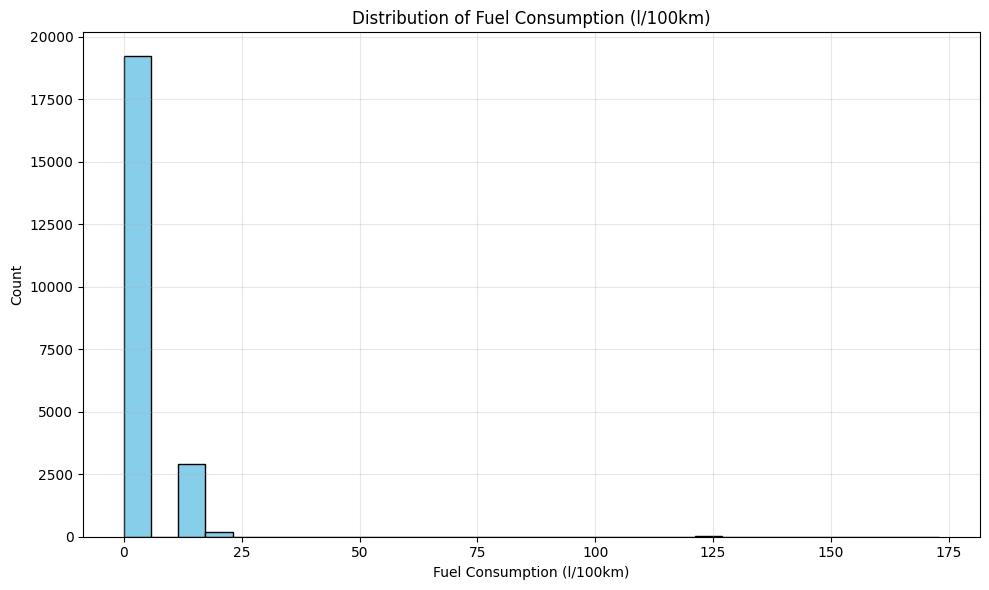

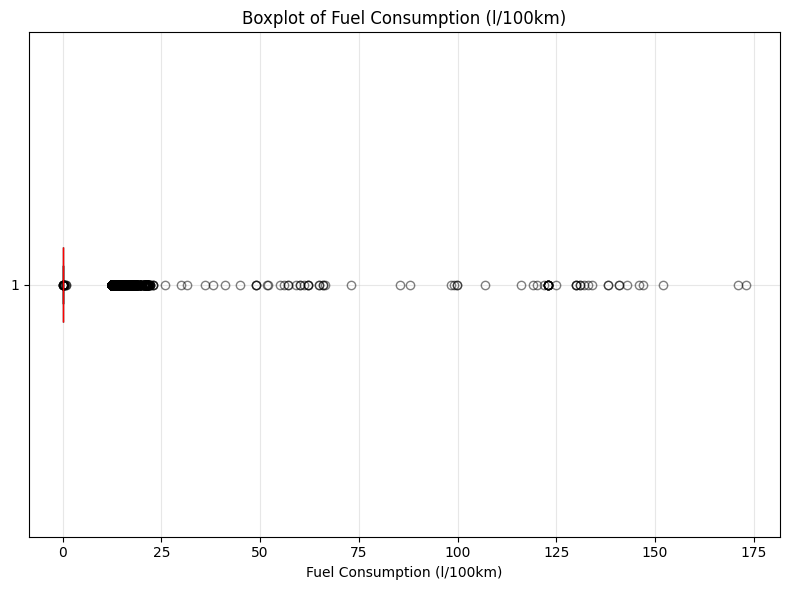

In [26]:
import matplotlib.pyplot as plt

# Create histogram for fuel_consumption_l_100km
plt.figure(figsize=(10, 6))
plt.hist(statistical_outliers['fuel_consumption_l_100km'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fuel Consumption (l/100km)')
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Create boxplot for fuel_consumption_l_100km
plt.figure(figsize=(8, 6))
plt.boxplot(statistical_outliers['fuel_consumption_l_100km'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='orange', alpha=0.5))
plt.title('Boxplot of Fuel Consumption (l/100km)')
plt.xlabel('Fuel Consumption (l/100km)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Number of outliers detected: 2162


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,brand_norm,model_norm,model_cleaned,predicted_consumption,residual,is_outlier
166383,seat,SEAT Tarraco,grey,08/2020,2020,25690,110.0,150.0,Manual,Petrol,173.0,28400.0,1.5 Style TSI BMT 7 Sitze Navi Klima,seat,seattarraco,SEAT Tarraco,6.690707,166.309293,True
183985,skoda,Skoda Karoq,white,04/2023,2023,40790,140.0,190.0,Automatic,Petrol,171.0,10.0,2.0TSI DSG 4x4 Sportline Navi DCC Kamera,skoda,skodakaroq,Skoda Karoq,6.651478,164.348522,True
120844,mini,MINI Cooper S,silver,07/2022,2022,27990,131.0,178.0,Automatic,Petrol,152.0,24000.0,"Cabrio Aut. Yours Trim, RFK, SHZ, Komfortzugan...",mini,minicoopers,MINI Cooper S,5.654623,146.345377,True
166362,seat,SEAT Ateca,grey,09/2020,2020,21990,110.0,150.0,Manual,Diesel,147.0,29000.0,2.0 Style TDI BMT Klima Radio Alu,seat,seatateca,SEAT Ateca,4.453688,142.546312,True
214007,volkswagen,Volkswagen T-Roc,red,03/2019,2019,18990,85.0,116.0,Manual,Diesel,146.0,40800.0,1.6 Comfortline StyleTDI BMT Navi Klima,volkswagen,volkswagentroc,Volkswagen T-Roc,4.126505,141.873495,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86819,maserati,Maserati Spyder,silver,10/2001,2001,26999,287.0,390.0,Automatic,Petrol,0.0,88000.0,GT Cambicorsa,maserati,maseratispyder,Maserati Spyder,15.863389,-15.863389,True
83519,lamborghini,Lamborghini Murciélago,grey,08/2005,2005,400000,427.0,581.0,Manual,Petrol,0.0,38577.0,Roadster manuell justforfun,lamborghini,lamborghinimurcilago,Lamborghini Murciélago,16.130633,-16.130633,True
83521,lamborghini,Lamborghini Murciélago,black,06/2005,2005,330000,427.0,581.0,Automatic,Petrol,0.0,5800.0,Roadster 5800km new condition German Spain,lamborghini,lamborghinimurcilago,Lamborghini Murciélago,16.130633,-16.130633,True
83534,lamborghini,Lamborghini Murciélago,orange,06/2007,2007,269000,471.0,640.0,Semi-automatic,Petrol,0.0,25000.0,LP640 2.Hand 25.000 KM Traumzustand,lamborghini,lamborghinimurcilago,Lamborghini Murciélago,16.570422,-16.570422,True


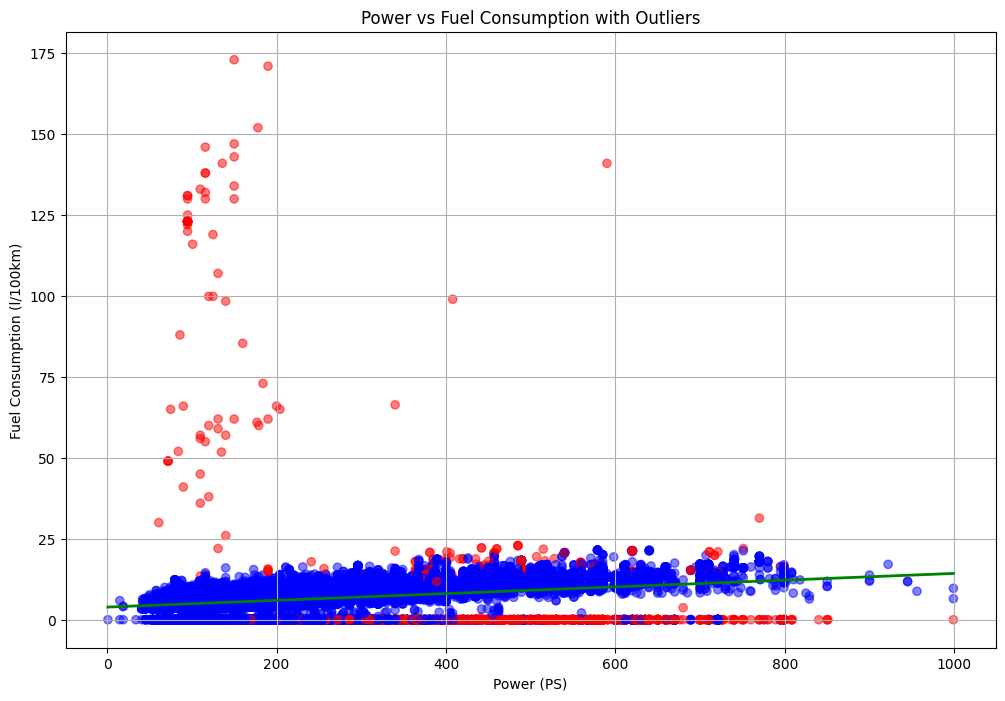

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

import matplotlib.pyplot as plt

# Create a copy of the dataframe with only valid fuel consumption and power values
df_valid = df.dropna(subset=['power_ps']).copy()

# Fit a linear regression model
X = df_valid[['brand', 'model', 'fuel_type', 'year', 'power_ps']]
X = pd.get_dummies(X, columns=['brand', 'model', 'fuel_type', 'year'], drop_first=True)
y = df_valid['fuel_consumption_l_100km'].values
model = LinearRegression().fit(X, y)

# Calculate predicted values and residuals
df_valid['predicted_consumption'] = model.predict(X)
df_valid['residual'] = df_valid['fuel_consumption_l_100km'] - df_valid['predicted_consumption']

# Calculate standard deviation of residuals
residual_std = df_valid['residual'].std()

# Identify outliers (residuals more than 3 standard deviations from the mean)
threshold = 3
df_valid['is_outlier'] = abs(df_valid['residual']) > threshold * residual_std

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_valid['power_ps'], df_valid['fuel_consumption_l_100km'], 
           c=df_valid['is_outlier'].map({True: 'red', False: 'blue'}), alpha=0.5)

# For visualization, create a simple trend line based on power_ps only
simple_model = LinearRegression().fit(
    df_valid['power_ps'].values.reshape(-1, 1), 
    df_valid['fuel_consumption_l_100km']
)

# Create points for the trend line
power_range = np.linspace(df_valid['power_ps'].min(), df_valid['power_ps'].max(), 100)
consumption_pred = simple_model.predict(power_range.reshape(-1, 1))

# Plot the trend line
plt.plot(power_range, consumption_pred, color='green', linewidth=2)

plt.title('Power vs Fuel Consumption with Outliers')
plt.xlabel('Power (PS)')
plt.ylabel('Fuel Consumption (l/100km)')
plt.grid(True)

# Print outliers
print(f"Number of outliers detected: {df_valid['is_outlier'].sum()}")

outliers = df_valid[df_valid['is_outlier']].sort_values(by='residual', ascending=False)
outliers

In [28]:
df_clean_fuel_outlier=df_valid.copy()
df_clean_fuel_outlier

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,brand_norm,model_norm,model_cleaned,predicted_consumption,residual,is_outlier
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148.0,201.0,Manual,Petrol,10.9,160500.0,2.0 V6 TB,alfaromeo,alfaromeogtv,Alfa Romeo GTV,4.947679,5.952321,False
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191.0,260.0,Manual,Petrol,0.0,190000.0,"Q4 Allrad, 3.2L GTA",alfaromeo,alfaromeo164,Alfa Romeo 164,6.188210,-6.188210,False
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110.0,150.0,Unknown,Petrol,0.0,129000.0,ALFA ROME 916,alfaromeo,alfaromeospider,Alfa Romeo Spider,4.548976,-4.548976,False
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110.0,150.0,Manual,Petrol,9.5,189500.0,2.0 16V Twin Spark L,alfaromeo,alfaromeospider,Alfa Romeo Spider,4.548976,4.951024,False
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132.0,179.0,Manual,Petrol,7.2,96127.0,"3.0i Super V6, absoluter Topzustand !",alfaromeo,alfaromeo164,Alfa Romeo 164,7.205895,-0.005895,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224343,volvo,Volvo V90 Cross Country,silver,01/2023,2023,65422,145.0,197.0,Automatic,Diesel,6.5,1506.0,B4 DIESEL PLUS AWD MY23 SELEKT,volvo,volvov90crosscountry,Volvo V90 Cross Country,5.807119,0.692881,False
224344,volvo,Volvo XC60,silver,05/2023,2023,55400,145.0,197.0,Automatic,Diesel,5.6,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC,volvo,volvoxc60,Volvo XC60,5.878916,-0.278916,False
224345,volvo,Volvo XC60,silver,03/2023,2023,54500,145.0,197.0,Automatic,Diesel,5.6,5900.0,B4 Autom. Plus Dark Sitzhzg.,volvo,volvoxc60,Volvo XC60,5.878916,-0.278916,False
224346,volvo,Volvo XC90,white,03/2023,2023,89690,173.0,235.0,Automatic,Diesel,7.6,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...,volvo,volvoxc90,Volvo XC90,6.420872,1.179128,False


Replaced 2162 outlier values with their predicted values

Before cleaning:
Min fuel consumption (non-zero): 0.1
Max fuel consumption: 173.0
Mean fuel consumption: 5.68

After cleaning:
Min fuel consumption (non-zero): 0.1
Max fuel consumption: 21.5
Mean fuel consumption: 5.72


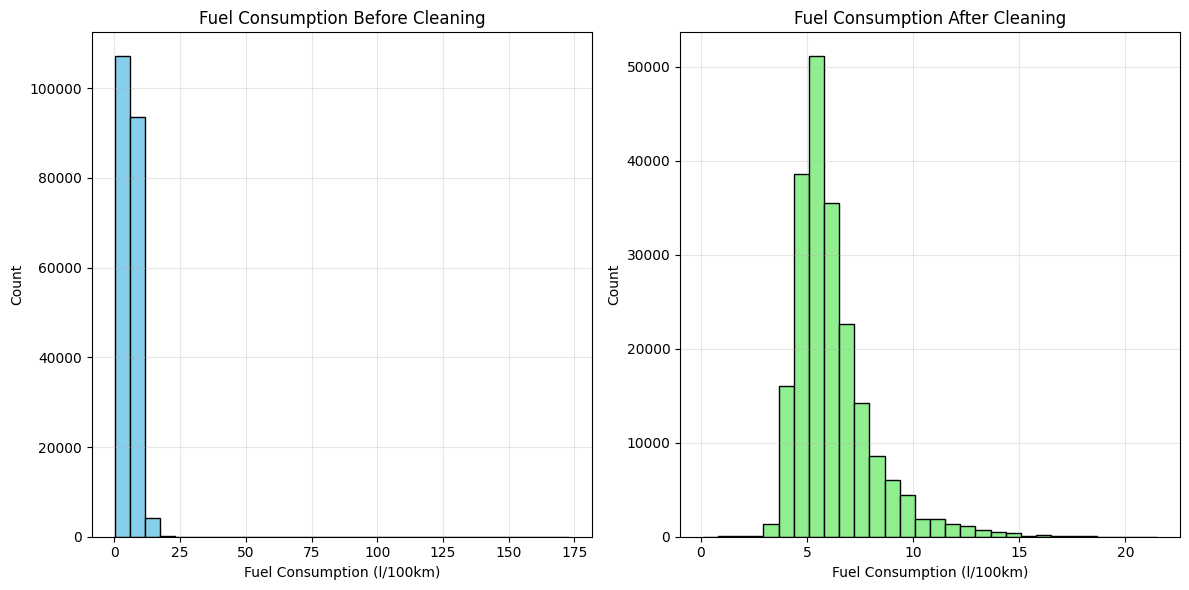


Sample of corrected outliers (before → after):
alfa-romeo Alfa Romeo GTV: 0.0 → 8.6
alfa-romeo Alfa Romeo Spider: 0.0 → 8.6
alfa-romeo Alfa Romeo Spider: 0.0 → 8.1
alfa-romeo Alfa Romeo Spider: 0.0 → 9.0
alfa-romeo Alfa Romeo 156: 0.0 → 7.8


In [29]:
# Replace outlier fuel consumption values with their predicted values
mask = df_clean_fuel_outlier['is_outlier']
df_clean_fuel_outlier.loc[mask, 'fuel_consumption_l_100km'] = df_clean_fuel_outlier.loc[mask, 'predicted_consumption']

# Count how many values were replaced
replaced_count = mask.sum()

# Create summary statistics
print(f"Replaced {replaced_count} outlier values with their predicted values")

# Compare before and after cleaning
print("\nBefore cleaning:")
print(f"Min fuel consumption (non-zero): {df.loc[df['fuel_consumption_l_100km'] > 0, 'fuel_consumption_l_100km'].min()}")
print(f"Max fuel consumption: {df['fuel_consumption_l_100km'].max()}")
print(f"Mean fuel consumption: {df['fuel_consumption_l_100km'].mean():.2f}")

print("\nAfter cleaning:")
print(f"Min fuel consumption (non-zero): {df_clean_fuel_outlier.loc[df_clean_fuel_outlier['fuel_consumption_l_100km'] > 0, 'fuel_consumption_l_100km'].min()}")
print(f"Max fuel consumption: {df_clean_fuel_outlier['fuel_consumption_l_100km'].max()}")
print(f"Mean fuel consumption: {df_clean_fuel_outlier['fuel_consumption_l_100km'].mean():.2f}")

# Visualize the distribution before and after
plt.figure(figsize=(12, 6))

# Plot before cleaning (only non-zero values)
plt.subplot(1, 2, 1)
plt.hist(df.loc[df['fuel_consumption_l_100km'] > 0, 'fuel_consumption_l_100km'], 
         bins=30, color='skyblue', edgecolor='black')
plt.title('Fuel Consumption Before Cleaning')
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Plot after cleaning (only non-zero values)
plt.subplot(1, 2, 2)
plt.hist(df_clean_fuel_outlier.loc[df_clean_fuel_outlier['fuel_consumption_l_100km'] > 0, 'fuel_consumption_l_100km'], 
         bins=30, color='lightgreen', edgecolor='black')
plt.title('Fuel Consumption After Cleaning')
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display a sample of the corrected outliers
print("\nSample of corrected outliers (before → after):")
sample_outliers = df_valid[mask].head(5)
for idx, row in sample_outliers.iterrows():
    original_val = df.loc[idx, 'fuel_consumption_l_100km']
    predicted_val = row['predicted_consumption']
    print(f"{row['brand']} {row['model']}: {original_val:.1f} → {predicted_val:.1f}")


1 4.3 7.6 3.3 12.549999999999999
Statistical outliers count: 20015

Top 10 high fuel consumption statistical outliers:
             brand                   model  power_ps  fuel_consumption_l_100km
83516  lamborghini  Lamborghini Murciélago     579.0                      21.5
83520  lamborghini  Lamborghini Murciélago     579.0                      21.5
83523  lamborghini  Lamborghini Murciélago     579.0                      21.5
83517  lamborghini  Lamborghini Murciélago     579.0                      21.5
83518  lamborghini  Lamborghini Murciélago     579.0                      21.5
83526  lamborghini  Lamborghini Murciélago     579.0                      21.5
83514  lamborghini  Lamborghini Murciélago     640.0                      21.5
83513  lamborghini  Lamborghini Murciélago     579.0                      21.5
83515  lamborghini  Lamborghini Murciélago     640.0                      21.5
83531  lamborghini  Lamborghini Murciélago     640.0                      21.3


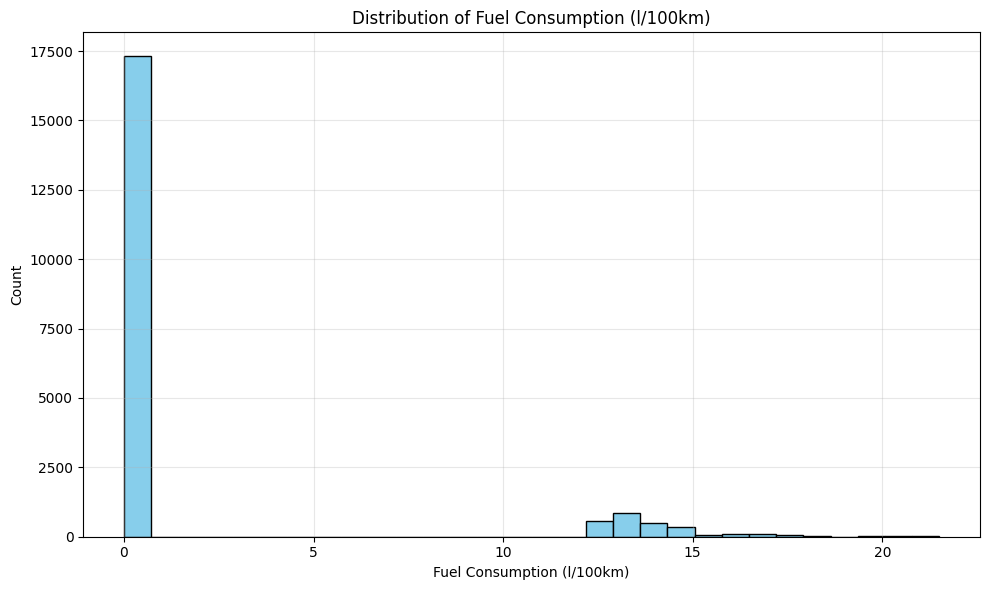

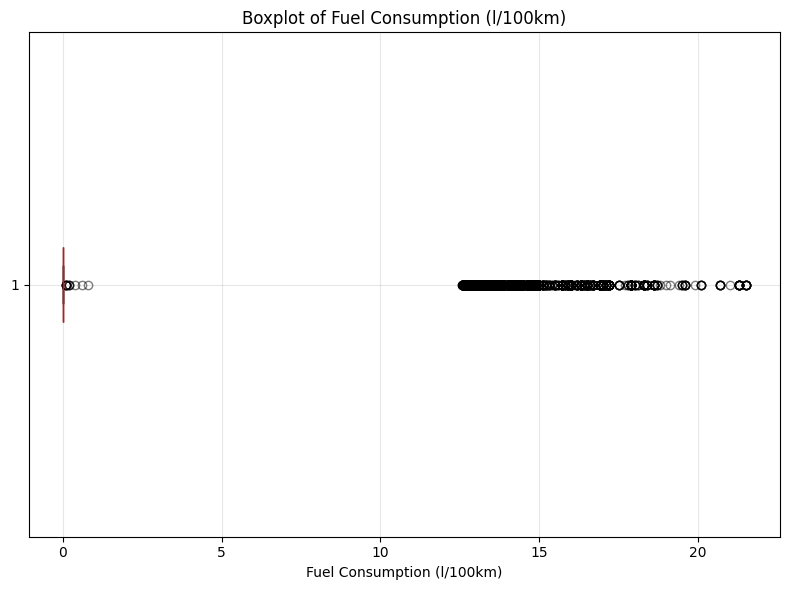

In [30]:
q1 = df_clean_fuel_outlier['fuel_consumption_l_100km'].quantile(0.15)
q3 = df_clean_fuel_outlier['fuel_consumption_l_100km'].quantile(0.85)
iqr = q3 - q1

lower_bound = 1 #nehme an es gibt keinen cars die unter 1 l/100km verbrauchen

upper_bound = q3 + 1.5 * iqr # 12.3 ist zu niedrig ein amg oder lambo verbraucht mehr als 12.3 l/100km

print(lower_bound, q1, q3, iqr, upper_bound)

# Find statistical outliers
statistical_outliers = df_clean_fuel_outlier[(df_clean_fuel_outlier['fuel_consumption_l_100km'] < lower_bound) | 
                          (df_clean_fuel_outlier['fuel_consumption_l_100km'] > upper_bound)]

print(f"Statistical outliers count: {len(statistical_outliers)}")
print("\nTop 10 high fuel consumption statistical outliers:")
print(statistical_outliers.sort_values('fuel_consumption_l_100km', ascending=False)[
    ['brand', 'model', 'power_ps', 'fuel_consumption_l_100km']].head(10))
import matplotlib.pyplot as plt

# Create histogram for fuel_consumption_l_100km
plt.figure(figsize=(10, 6))
plt.hist(statistical_outliers['fuel_consumption_l_100km'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fuel Consumption (l/100km)')
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Create boxplot for fuel_consumption_l_100km
plt.figure(figsize=(8, 6))
plt.boxplot(statistical_outliers['fuel_consumption_l_100km'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='orange', alpha=0.5))
plt.title('Boxplot of Fuel Consumption (l/100km)')
plt.xlabel('Fuel Consumption (l/100km)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Basic statistics for cleaned fuel consumption data:
count    224348.000000
mean          5.721183
std           2.419721
min           0.000000
25%           4.800000
50%           5.600000
75%           6.800000
max          21.500000
Name: fuel_consumption_l_100km, dtype: float64

Zero values in cleaned data: 17298 (7.71%)

Average fuel consumption by fuel type:
fuel_type
Diesel    5.128132
Petrol    6.081839
Name: fuel_consumption_l_100km, dtype: float64


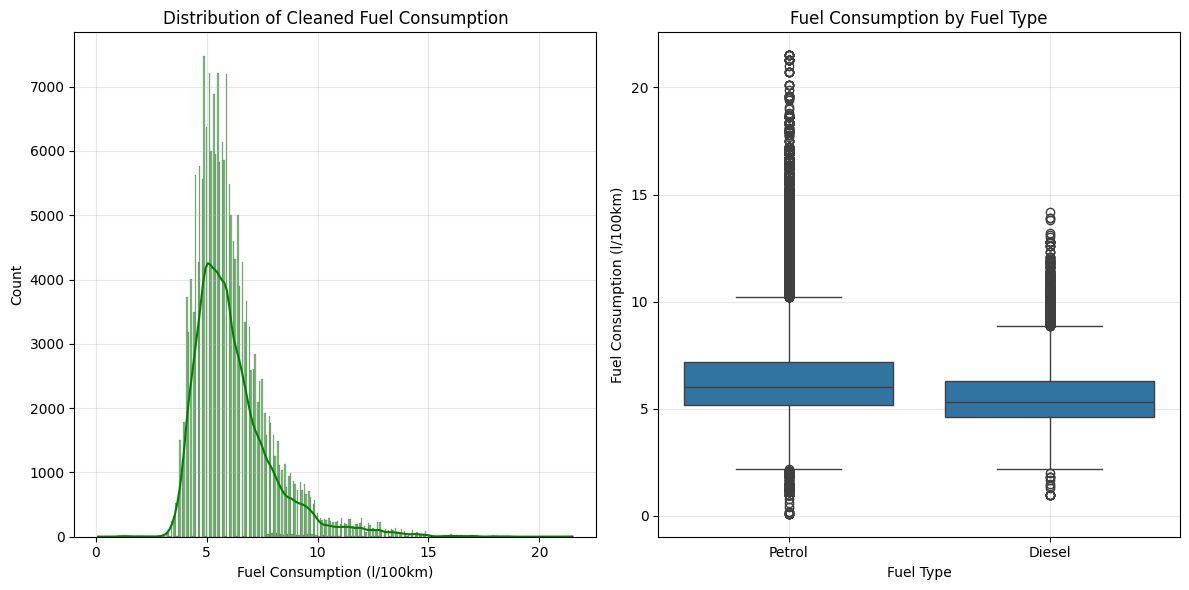

In [31]:
import seaborn as sns

# Check basic statistics of the cleaned DataFrame
print("Basic statistics for cleaned fuel consumption data:")
print(df_clean_fuel_outlier['fuel_consumption_l_100km'].describe())

# Count remaining zeros
zero_count_after = (df_clean_fuel_outlier['fuel_consumption_l_100km'] == 0).sum()
print(f"\nZero values in cleaned data: {zero_count_after} ({zero_count_after/len(df_clean_fuel_outlier)*100:.2f}%)")

# Check distribution by fuel type
print("\nAverage fuel consumption by fuel type:")
print(df_clean_fuel_outlier.groupby('fuel_type')['fuel_consumption_l_100km'].mean())

# Create visualization to compare distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram of cleaned data
plt.subplot(1, 2, 1)
sns.histplot(df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] > 0]['fuel_consumption_l_100km'], 
             kde=True, color='green')
plt.title('Distribution of Cleaned Fuel Consumption')
plt.xlabel('Fuel Consumption (l/100km)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Boxplot by fuel type
plt.subplot(1, 2, 2)
sns.boxplot(x='fuel_type', y='fuel_consumption_l_100km', 
            data=df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] > 0])
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (l/100km)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# immer noch Zero values in cleaned data: 17298 (7.71%) für fuel_consumption_l_100km
 


In [32]:
# Replace values < 1 in 'fuel_consumption_l_100km' with estimated values
# First identify rows with fuel consumption < 1
low_consumption_mask = df_clean_fuel_outlier['fuel_consumption_l_100km'] < 1

# Create a multi-level replacement strategy
# First try model and year specific mean
model_year_means = df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] >= 1].groupby(['model', 'year'])['fuel_consumption_l_100km'].mean()

# Then try model specific mean (if model-year combination doesn't have valid values)
model_means = df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] >= 1].groupby('model')['fuel_consumption_l_100km'].mean()

# Then try brand and fuel_type mean (fallback)
brand_fuel_means = df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] >= 1].groupby(['brand', 'fuel_type'])['fuel_consumption_l_100km'].mean()

# Create replacement function
def get_replacement_value(row):
    if row['fuel_consumption_l_100km'] >= 1:
        return row['fuel_consumption_l_100km']
    
    # Try model-year specific mean
    try:
        return model_year_means.loc[(row['model'], row['year'])]
    except (KeyError, TypeError):
        # Try model specific mean
        try:
            return model_means.loc[row['model']]
        except (KeyError, TypeError):
            # Fall back to brand-fuel_type mean
            try:
                return brand_fuel_means.loc[(row['brand'], row['fuel_type'])]
            except (KeyError, TypeError):
                # Last resort: global mean
                return df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] >= 1]['fuel_consumption_l_100km'].mean()

# Apply the replacement
df_clean_fuel_outlier['fuel_consumption_l_100km'] = df_clean_fuel_outlier.apply(get_replacement_value, axis=1)

# Print stats on replacements
replaced_count = low_consumption_mask.sum()
print(f"Replaced {replaced_count} values that were < 1 l/100km")
print(f"Remaining zero values: {(df_clean_fuel_outlier['fuel_consumption_l_100km'] == 0).sum()}")

Replaced 17310 values that were < 1 l/100km
Remaining zero values: 0


In [33]:
# Find minimum and maximum values
min_consumption = df_clean_fuel_outlier['fuel_consumption_l_100km'].min()
max_consumption = df_clean_fuel_outlier['fuel_consumption_l_100km'].max()

# Find minimum non-zero value (as 0 likely represents missing data)
min_nonzero = df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] > 0]['fuel_consumption_l_100km'].min()

print(f"Minimum value: {min_consumption}")
print(f"Minimum non-zero value: {min_nonzero}")
print(f"Maximum value: {max_consumption}")

# Show examples of cars with extreme values
print("\nCars with lowest non-zero consumption:")
print(df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] == min_nonzero][['brand', 'model', 'fuel_type', 'power_ps', 'fuel_consumption_l_100km']].head())

print("\nCars with highest consumption:")
print(df_clean_fuel_outlier[df_clean_fuel_outlier['fuel_consumption_l_100km'] == max_consumption][['brand', 'model', 'fuel_type', 'power_ps', 'fuel_consumption_l_100km']].head())

# Statistical summary
print("\nStatistical summary:")
print(df_clean_fuel_outlier['fuel_consumption_l_100km'].describe())

Minimum value: 1.0
Minimum non-zero value: 1.0
Maximum value: 21.5

Cars with lowest non-zero consumption:
                brand                   model fuel_type  power_ps  \
15597            audi                 Audi A3    Diesel     150.0   
48625            fiat              Fiat Panda    Petrol      69.0   
69301            ford             Ford Fiesta    Petrol     125.0   
104829  mercedes-benz  Mercedes-Benz Sprinter    Diesel     163.0   
111554  mercedes-benz     Mercedes-Benz A 220    Diesel     177.0   

        fuel_consumption_l_100km  
15597                        1.0  
48625                        1.0  
69301                        1.0  
104829                       1.0  
111554                       1.0  

Cars with highest consumption:
             brand                   model fuel_type  power_ps  \
83513  lamborghini  Lamborghini Murciélago    Petrol     579.0   
83514  lamborghini  Lamborghini Murciélago    Petrol     640.0   
83515  lamborghini  Lamborghini Murcié

In [24]:
import pandas as pd
import numpy as np 
import re



def fix_model_brand_conflicts(df):
    '''Diese Funktion überprüft, ob es Zeilen gibt, in denen brand = model ist. In diesen Zeilen haben wir keine Informationen
    über das Model. 
    
    Um die Zeilen aber nicht direkt zu droppen, wird vorher geschaut, ob man über bestimmte Spalten das Model eindeutig zuornden kann.
    Ist eine eindeutige Zuordnung möglich, dann überschreiben wir die ursprüngliche Ausprägung in model. Ist keine Zuordnung möglich, dann wird die Zeile
    gedroppt.
    '''

    def normalize(text):
        if pd.isna(text):
            return ""
        return re.sub(r'[^a-z0-9]', '', text.lower())

    df.loc[:, 'brand_norm'] = df['brand'].apply(normalize)
    df.loc[:, 'model_norm'] = df['model'].apply(normalize)

    mask_same = df['brand_norm'] == df['model_norm']

    problem_rows = df[mask_same].copy()
    clean_rows = df[~mask_same].copy()

    grouped_models = clean_rows \
        .groupby(['brand', 'power_ps', 'fuel_consumption_g_km', 'transmission_type', 'fuel_type'])['model'] \
        .unique().reset_index() 

    grouped_models = grouped_models[grouped_models['model'].apply(len) == 1] # nur kontexte bei denen model unique ist (ein element in der liste)
    grouped_models['model'] = grouped_models['model'].apply(lambda x: x[0]) # nimm nur das erste element aus der liste

    problem_fixed = problem_rows.merge(grouped_models, on=['brand', 'power_ps', 'fuel_consumption_g_km', 'transmission_type', 'fuel_type'],
                                       how='left', suffixes=('', '_fixed'))

    recovered = problem_fixed[problem_fixed['model_fixed'].notna()].copy()
    recovered['model'] = recovered['model_fixed']
    recovered = recovered.drop(columns=['model_fixed'])

    final_df = pd.concat([clean_rows, recovered], ignore_index=True) \
                 .drop(columns=['brand_norm', 'model_norm'])

    return final_df

def clean_fuel_consumption(value): # Bei Elektroautos steht Reichweite
    if pd.isna(value) or 'l/100 km' not in str(value):
        return np.nan
    try:
        return float(value.split(' ')[0].replace(',', '.'))
    except:
        return np.nan
                    
def clean_fuel_consumption_g(value):
    if pd.isna(value) or value == '- (g/km)' or 'g/km' not in str(value): # Bei Elektroautos steht Reichweite
        return np.nan
    try:
        return float(value.split(' ')[0])
    except:
        return np.nan

def calculate_fuel_consumption(row):

        conversion_factor = 0.043103448275862

        if pd.isna(row['fuel_consumption_l_100km']) or row['fuel_consumption_l_100km'] == 0:
            if pd.notna(row['fuel_consumption_g_km']) and row['fuel_consumption_g_km'] != 0:
                return row['fuel_consumption_g_km'] * conversion_factor
            else:
                return np.nan
        else:
            return row['fuel_consumption_l_100km']

def impute_fuel_staged(df, target_col):
    groupings = [
        ['brand', 'model', 'year', 'power_ps', 'fuel_type', 'transmission_type'],  # Stufe 1: eindeutig
        ['brand', 'model', 'power_ps', 'fuel_type', 'transmission_type'],          # Stufe 2: Mittelwert
        ['model', 'fuel_type']                                                     # Stufe 3: fallback
    ]
    
    # Stufe 1: nur eindeutige Fälle (nunique == 1)
    group_cols = groupings[0]
    counts = df.groupby(group_cols)[target_col].nunique().reset_index(name='unique_count')
    unique_contexts = counts.query('unique_count == 1').drop(columns='unique_count')

    fuel_map_unique = (
        df.dropna(subset=[target_col])
          .merge(unique_contexts, on=group_cols, how='inner')
          .groupby(group_cols)[target_col]
          .first()
    )

    def fill_unique(row):
        if pd.isna(row[target_col]):
            key = tuple(row[col] for col in group_cols)
            return fuel_map_unique.get(key, np.nan)
        return row[target_col]

    df[target_col] = df.apply(fill_unique, axis=1)

    # Stufe 2 & 3: falls noch NaNs, mit mean
    for group_cols in groupings[1:]:
        fuel_map_mean = (
            df.dropna(subset=[target_col])
              .groupby(group_cols)[target_col]
              .mean()
              .round(2)
        )

        def fill_mean(row):
            if pd.isna(row[target_col]):
                key = tuple(row[col] for col in group_cols)
                return fuel_map_mean.get(key, np.nan)
            return row[target_col]

        df[target_col] = df.apply(fill_mean, axis=1)

    return df

In [25]:
def preprocess_new(df):

    # load the data 
    #df = pd.read_csv('data.csv')

    # entferne Duplikate  
    df = df.drop_duplicates(subset= ['brand', 'model', 'color', 'registration_date', 'year',
    'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
    'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
    'mileage_in_km', 'offer_description']).reset_index(drop= True).copy()

    # Droppe zweite Index Spalte
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

     # Zeilen mit falschen Jahreszahlen werden herausgenommen
    yearsToFilter = list(df['year'].unique()[:29])
    filt = [val in yearsToFilter for val in df['year']]
    df = df[filt]

    df = df.loc[df['fuel_type'].isin(['Diesel', 'Petrol'])].copy()

    
    # Verbleibende Fahrzeuge die zwar Petrol und Diesel sind aber nicht g/km haben sondern 
    # Reichweite etc. 
    df = df.loc[df['fuel_consumption_g_km'].str.contains(r'g/km', na=False)]

    

    # Try to fix rows where brand = model
    df = fix_model_brand_conflicts(df)
    # convert to numeric
    df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].apply(clean_fuel_consumption)
    df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(clean_fuel_consumption_g) 

    # calculate fuel_consumption using formula
    df['fuel_consumption_l_100km'] = df.apply(calculate_fuel_consumption, axis=1)


    df = impute_fuel_staged(df, target_col='fuel_consumption_l_100km')
    df = impute_fuel_staged(df, target_col='fuel_consumption_g_km')

    df.drop(columns=['fuel_consumption_g_km'], axis = 1)
        
    # Spalten ins numerische umwandeln
    for col in ['power_ps', 'power_kw', 'mileage_in_km', 'price_in_euro']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        
    # Encoding vom Datum ins numerische
    df['registration_date'] = pd.to_datetime(df['registration_date'], format='%m/%Y', errors='coerce')
    df['registration_month'] = df['registration_date'].dt.month
    df['registration_year'] = df['registration_date'].dt.year

    df = df.drop(['registration_date', 'year','power_kw', 'fuel_consumption_g_km'], axis=1) # year sonst zweimal drinne


    df = df.dropna().reset_index(drop= True)

    return df

In [26]:
df=preprocess_new(df)

KeyError: Index(['fuel_consumption_g_km'], dtype='object')

In [ ]:
df["fuel_type"].value_counts()

fuel_type
Petrol    139514
Diesel     84030
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

brand                           0
model                           0
color                          72
registration_date               0
year                            0
price_in_euro                   0
power_kw                       73
power_ps                       73
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    17499
fuel_consumption_g_km           0
mileage_in_km                  29
offer_description               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223544 entries, 0 to 244723
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     223544 non-null  object 
 1   model                     223544 non-null  object 
 2   color                     223472 non-null  object 
 3   registration_date         223544 non-null  object 
 4   year                      223544 non-null  object 
 5   price_in_euro             223544 non-null  object 
 6   power_kw                  223471 non-null  object 
 7   power_ps                  223471 non-null  object 
 8   transmission_type         223544 non-null  object 
 9   fuel_type                 223544 non-null  object 
 10  fuel_consumption_l_100km  206045 non-null  object 
 11  fuel_consumption_g_km     223544 non-null  object 
 12  mileage_in_km             223515 non-null  float64
 13  offer_description         223544 non-null  object